## Histograms and Binnings

A simple histogram can be a great first step in understanding a dataset. Matplotlibs' histogram function creates a basic histogram in one line once the normal imports are done:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

(array([  3.,  16.,  64., 153., 271., 235., 170.,  74.,  11.,   3.]),
 array([-3.47676355, -2.77703863, -2.0773137 , -1.37758878, -0.67786385,
         0.02186108,  0.721586  ,  1.42131093,  2.12103585,  2.82076078,
         3.5204857 ]),
 <BarContainer object of 10 artists>)

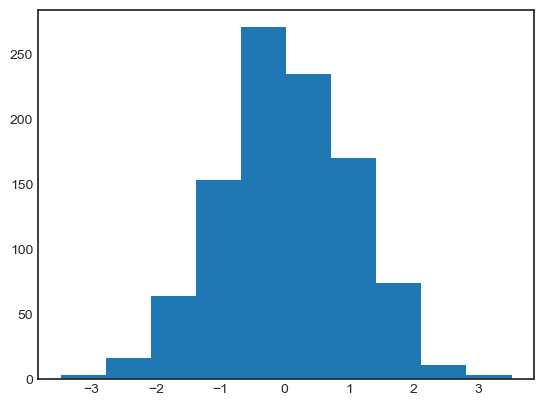

In [2]:
plt.hist(data)

The `hist()` function has many options to tune both the calculation and the display; here's an example of a more customized histogram:

(array([ 2.,  2.,  6.,  6., 14., 20., 38., 44., 44., 73., 66., 84., 79.,
        96., 80., 78., 61., 48., 39., 35., 25., 24., 16., 12.,  2.,  3.,
         1.,  1.,  0.,  1.]),
 array([-2.78743514, -2.58375464, -2.38007415, -2.17639365, -1.97271316,
        -1.76903266, -1.56535217, -1.36167167, -1.15799118, -0.95431068,
        -0.75063019, -0.54694969, -0.3432692 , -0.1395887 ,  0.06409179,
         0.26777229,  0.47145278,  0.67513328,  0.87881377,  1.08249427,
         1.28617476,  1.48985526,  1.69353575,  1.89721625,  2.10089674,
         2.30457723,  2.50825773,  2.71193822,  2.91561872,  3.11929921,
         3.32297971]),
 [<matplotlib.patches.Polygon at 0x7fbeb8177d00>])

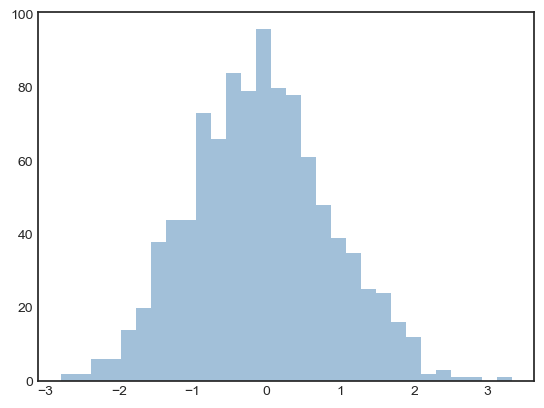

In [6]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

The combination of `histtype='stepfilled'` along with some transparency `alpha` can be very useful when comparing histograms of several distributions:

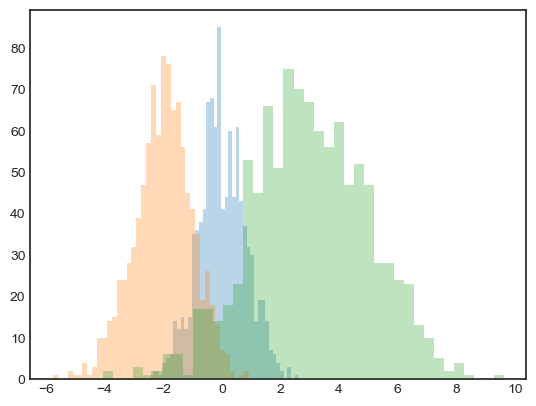

In [8]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

for i in [x1, x2, x3]:
    plt.hist(i, histtype='stepfilled', alpha=0.3, bins=40)

If you would like to simply count the number of points in a given bin (that is, compute the histogram) and not display it, the `np.histogram()` function is available:

In [9]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 50 349 442 151   8]


In [10]:
print(bin_edges)

[-2.78743514 -1.56535217 -0.3432692   0.87881377  2.10089674  3.32297971]


### 2-Dimensional Histograms and Binnings

Just as we create histograms in 1 dimension by dividing the number-line into bins, we can also create histograms in 2-dimensions by dividing points among 2-dimensional bins. We'll take a brief look at several ways to do this here. Let's start by defining some data - an `x` and `y` array drawn from a multivariate normal distribution:

In [11]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

#### `plt.hist2d`: 2-Dimensional Histogram 

One straightforward way to plot a 2-dimensional histogram is to use Matplotlib's `plt.hist2d` function:

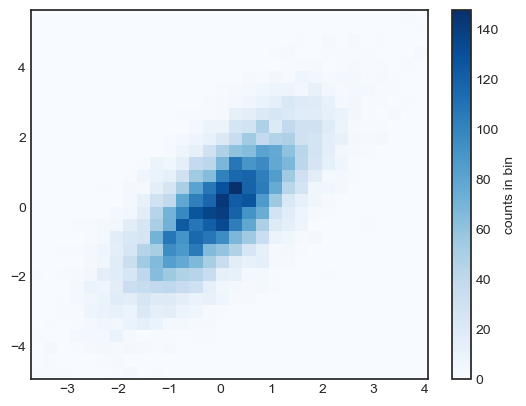

In [7]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with `plt.hist`, `plt.hist2d` has a number of extra options to fine-tune the plot and the binnings, which are outlined in the function docstring. Further, just as `plt.hist` has a counterpart in `np.histogram`, `plt.hist2d` has a counterpart in `np.histogram2d`:

In [9]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

For the generalization of this histogram binning in dimensions higher than 2, see the `np.histogramdd` function.

#### `plt.hexbin`: Hexagonal Binnings

The 2-dimensional histogram creates a tesselation of squares across the axes. Another natural shape for such a tesselation is the regular hexagon. For this purpose, Matplotlib provides the `plt.hexbin` routine, which will represent a 2-dimensional dataset binned within a grid of hexagons:

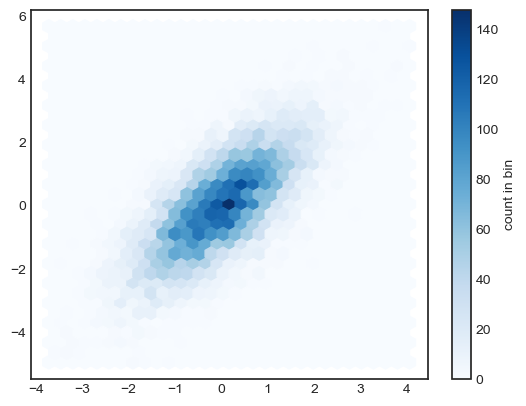

In [10]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

`plt.hexbin` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.)